# Noise Reduction Tests

Just some tests to ensure the following:

1. Noise is reduced
2. Exoplanets are gone

In [1]:
import sys, os

# Getting the module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# The important imports
from kepler.models.noise import keplerRemoveNoise as removeNoise
import lightkurve as lk

# Cannot forget the inline
%matplotlib inline

# Load extensions
%load_ext autoreload
%autoreload 2

In [2]:
# Test Function

def noiseTest(name):
    tpf = lk.search_targetpixelfile(name)[:2].download_all()
    tpf.plot()
    return removeNoise(tpf)

## <u>The table of tests</u>

### Binary Systems Tests

- [Test 1 - KIC 3863594](#KIC-3863594)

### Exoplanet Filter Tests
- [Test 1 - Kepler 1b](#Kepler-1b)
- [Test 2 - Kepler 6b](#Kepler-6b)

## KIC 3863594

## Kepler 1

## Kepler 6

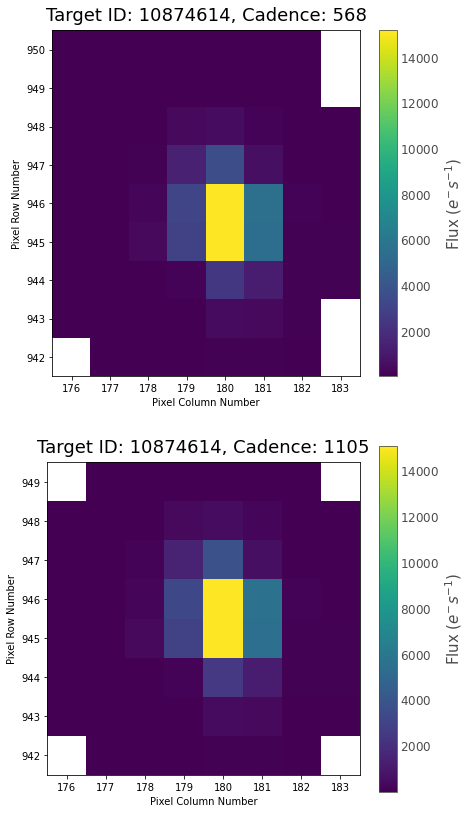

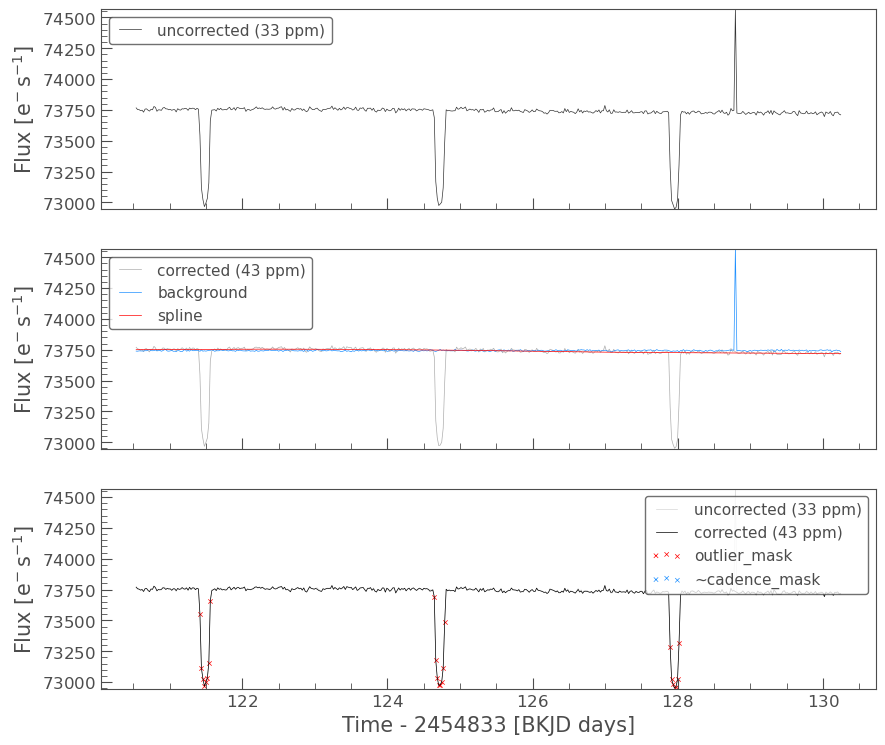

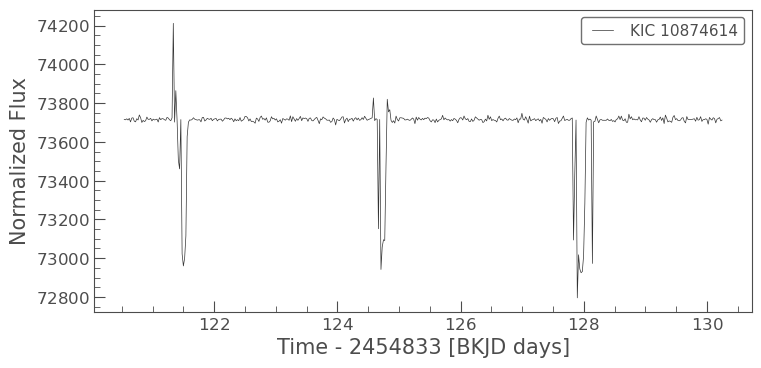

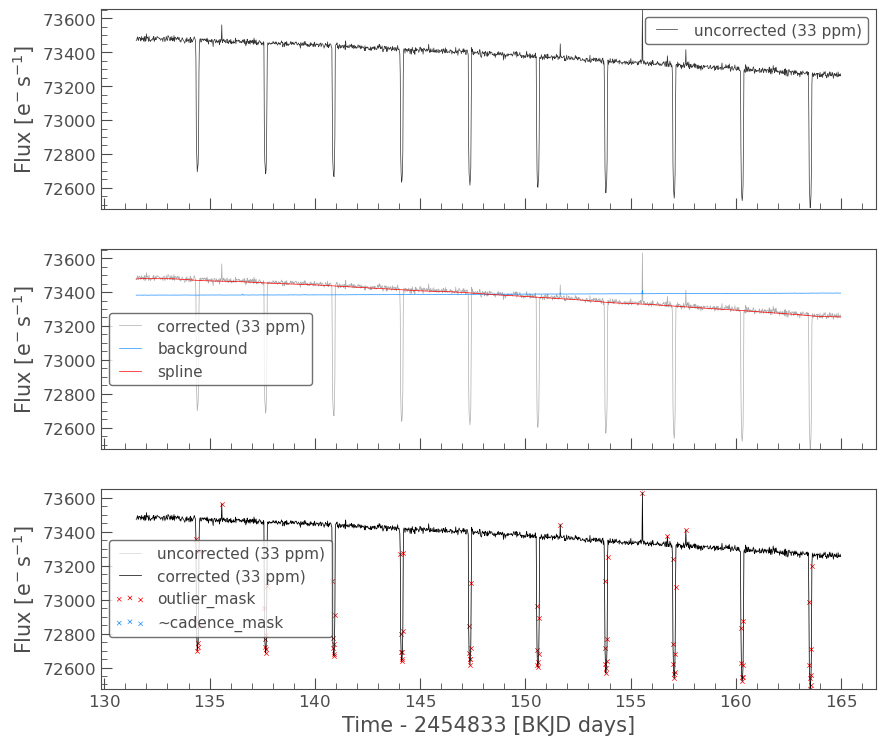

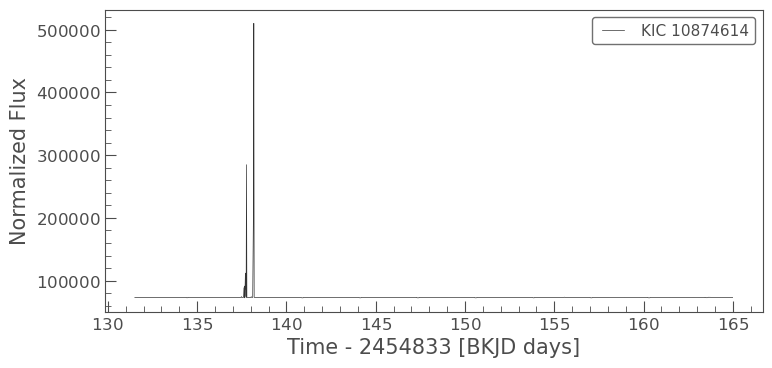

In [4]:
for i in noiseTest("Kepler-6"):
    i[0].plot()